In [28]:
# import dependencies
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np

In [30]:
# load your files 
ifgpath="/scratch/"         # directory with your interferogram
ifgname="filt_topophase.unw.geo"                                      # interferogram file
mskname="crop.wbd"   

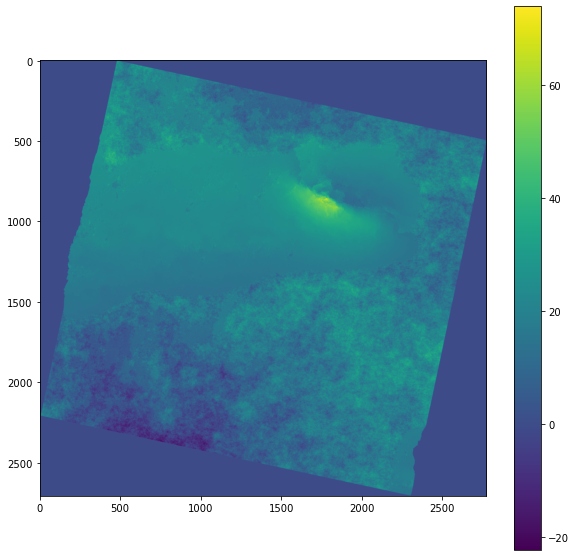

In [31]:
# unwrapped interferogram
ifgfile=gdal.Open(ifgpath+ifgname,gdal.GA_ReadOnly)   # open with gdal
rb = ifgfile.GetRasterBand(2)                         # phase info is in band 2
ifg = rb.ReadAsArray()                                # read it in as a number array

#plot it 
fig, ax = plt.subplots(figsize=(10,10))        # new figure called "ax1"
im = ax.imshow(ifg,origin='upper')             # plot the masked interferogram file
fig.colorbar(im)                               # plot a color bar!
plt.show()

In [32]:
# this will show the dimensions of the interferogram 
#ifgfullpath=ifgpath+ifgname
#!gdalinfo $ifgfullpath

In [33]:
# finding geotransform
# https://gdal.org/tutorials/geotransforms_tut.html
gt=ifgfile.GetGeoTransform()

# finding numbers of rows and columns interferogram
nr=ifgfile.RasterYSize
nc=ifgfile.RasterXSize

# extract interferogram dimensions
minlon=gt[0]
maxlon=gt[0]+gt[1]*nc    # find the max lon
maxlat=gt[3]
minlat=gt[3]+gt[5]*nr

In [34]:
# if you haven't already downloaded the water body mask file...
# assumes that you have patched the ISCE scripts to point to https URLs...
!wbd.py $minlat $maxlat $minlon $maxlon

This is the Open Source version of ISCE.
Some of the workflows depend on a separate licensed package.
To obtain the licensed package, please make a request for ISCE
through the website: https://download.jpl.nasa.gov/ops/request/index.cfm.
Alternatively, if you are a member, or can become a member of WinSAR
you may be able to obtain access to a version of the licensed sofware at
https://winsar.unavco.org/software/isce
water body file: swbdLat_S09_S07_Lon_E124_E126.wbd
exists, do not download and correct


In [35]:
# get the file name for your mask
!ls *.wbd.vrt
wbdname = 'swbdLat_S09_S07_Lon_E124_E126.wbd.vrt'   # paste it in here

swbdLat_S09_S07_Lon_E124_E126.wbd.vrt


In [36]:
# crop the water mask to the interferogram
!gdalwarp -of ISCE  -te $minlon $minlat $maxlon $maxlat $wbdname $mskname

ERROR 1: Output dataset crop.wbd exists,
but some command line options were provided indicating a new dataset
should be created.  Please delete existing dataset and run again.



In [13]:
# check the uwrapping and correlation , especialy near the fault 

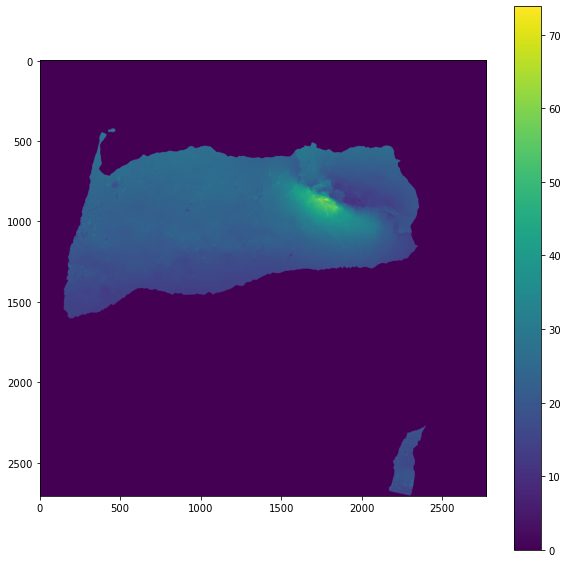

In [45]:
mskfile=gdal.Open(mskname,gdal.GA_ReadOnly)  
rb = mskfile.GetRasterBand(1)                         # only one band here
msk = rb.ReadAsArray()

# water masked interferogram with nan
#ifg[msk>0]=np.nan     # all numbers greater than 0 set to nan

wmsk=np.zeros_like(msk)  # zero array same size as wbd mask
wmsk[msk==0]=1

# water masked interferogram with np.zeros 
inter_watermasked= np.multiply(ifg, wmsk)

#
fig, ax = plt.subplots(figsize=(10,10))        # new figure called "ax1"
im = ax.imshow(inter_watermasked,origin='upper')             # plot the masked interferogram file
fig.colorbar(im)                               # plot a color bar!
plt.show()

In [46]:
# make a geotiff with the water_masked interferogram
driver = gdal.GetDriverByName("GTiff")
outdata = driver.Create('filt_topophase_watermasked.tif', nc, nr, 1, gdal.GDT_Float32)
outdata.SetGeoTransform(mskfile.GetGeoTransform()) ##sets same geotransform as input
outdata.SetProjection(mskfile.GetProjection())##sets same projection as input
outdata.GetRasterBand(1).WriteArray(inter_watermasked)
outdata.GetRasterBand(1).SetNoDataValue(0)##if you want these values transparent
outdata.FlushCache() ##saves to disk!!


In [47]:
pwd

'/home/karlee/earthquakes/reorganized_alor_NB/make_and_apply_watermask'